In [0]:
!pip install seaborn==0.9.0

In [0]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sb
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.svm import LinearSVC, SVC

In [0]:
dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv")
mapa = {"unfinished":"inacabado", "expected_hours":"prazo_estimado", "price":"custo"}
dados = dados.rename(columns = mapa)

In [0]:
dados.head()

,inacabado,prazo_estimado,custo
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [0]:
X = dados[["prazo_estimado", "custo"]]
Y = dados["inacabado"]

In [0]:
troca_y = {1:0, 0:1}
dados.inacabado = dados.inacabado.map(troca_y)

In [0]:
inacabado_to_finalizado = {"inacabado":"finalizado", "prazo_estimado":"prazo_estimado",	"custo"	:"preco"}
dados = dados.rename(columns = inacabado_to_finalizado)
dados.head()

,finalizado,prazo_estimado,preco
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170


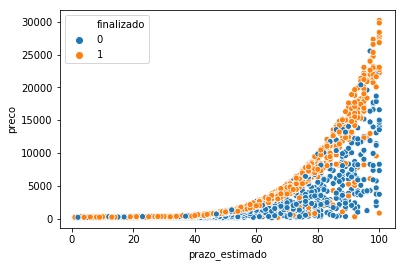

In [0]:
sb.scatterplot(x="prazo_estimado",y="preco", hue="finalizado", data=dados)

In [0]:
x = dados[["prazo_estimado", "preco"]]
y = dados["finalizado"]
seed=2
np.random.seed(seed) #agora, caso nao queiramos passar parametro algum como random state ele usara do numpy
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, random_state=seed, test_size=0.25, stratify=y  )

In [0]:
modelo_linear = LinearSVC(max_iter=3000, random_state=seed)
modelo_quadratico = SVC(degree=3, random_state=seed)

In [85]:
modelo_linear.fit(x_treino,y_treino)
linear_predict = modelo_linear.predict(x_teste)
accuracy_score(linear_predict, y_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5388888888888889

In [86]:
modelo_quadratico.fit(x_treino,y_treino)
quadratico_predict = modelo_quadratico.predict(x_teste)
accuracy_score(quadratico_predict, y_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5962962962962963

Aqui a gente vai consertar a escala para conseguir ver melhor

In [0]:
x_full = []
for i in range(1,101): x_full.append(i)
print(x_full)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [0]:
y_full = [] 
i = 1
while i<25001: 
  y_full.append(i); 
  i+=250;
print(y_full);

[1, 251, 501, 751, 1001, 1251, 1501, 1751, 2001, 2251, 2501, 2751, 3001, 3251, 3501, 3751, 4001, 4251, 4501, 4751, 5001, 5251, 5501, 5751, 6001, 6251, 6501, 6751, 7001, 7251, 7501, 7751, 8001, 8251, 8501, 8751, 9001, 9251, 9501, 9751, 10001, 10251, 10501, 10751, 11001, 11251, 11501, 11751, 12001, 12251, 12501, 12751, 13001, 13251, 13501, 13751, 14001, 14251, 14501, 14751, 15001, 15251, 15501, 15751, 16001, 16251, 16501, 16751, 17001, 17251, 17501, 17751, 18001, 18251, 18501, 18751, 19001, 19251, 19501, 19751, 20001, 20251, 20501, 20751, 21001, 21251, 21501, 21751, 22001, 22251, 22501, 22751, 23001, 23251, 23501, 23751, 24001, 24251, 24501, 24751]


In [0]:
xx, yy = np.meshgrid(x_full, y_full) #cria 25 mil listas com 100
print(xx)

[[  1   2   3 ...  98  99 100]
 [  1   2   3 ...  98  99 100]
 [  1   2   3 ...  98  99 100]
 ...
 [  1   2   3 ...  98  99 100]
 [  1   2   3 ...  98  99 100]
 [  1   2   3 ...  98  99 100]]


In [0]:
pontos = np.c_[xx.ravel(), yy.ravel()] #concatena a lista concatenada de forma consecutiva pelo ravel
len(pontos)

10000

In [0]:
pontos

array([[    1,     1],
       [    2,     1],
       [    3,     1],
       ...,
       [   98, 24751],
       [   99, 24751],
       [  100, 24751]])

In [0]:
xx.shape

(100, 100)

In [0]:
Z = modelo_linear.predict(pontos)
Z.shape

(10000,)

In [0]:
Z = Z.reshape(xx.shape)

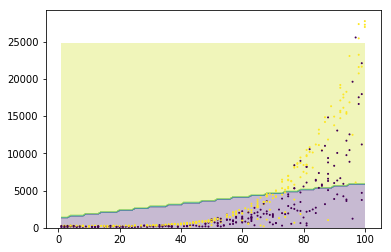

In [0]:
import matplotlib.pyplot as plt #Valido sempre lembrar que os algoritmos sao sempre sucetiveis a escala!!

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_teste.prazo_estimado, x_teste.preco, c=y_teste, s=1)

Corrigindo a escala

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_treino)
x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [90]:
x_treino

array([[ 0.05590335, -0.39439044],
       [-1.45010824, -0.57569114],
       [-1.55517882, -0.5814185 ],
       ...,
       [ 0.16097393, -0.32803202],
       [ 0.2660445 , -0.17773809],
       [ 1.17665617,  1.70636718]])

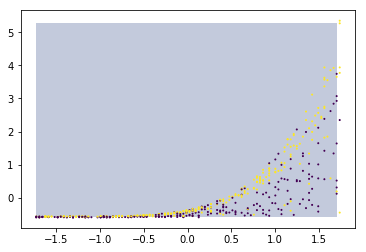

In [91]:
data_x = x_teste[:,0]
data_y = x_teste[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo_quadratico.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_teste, s=1)